In [194]:
from iexfinance.stocks import Stock
import pandas as pd
import numpy as np
from pathlib import Path
from newsapi.newsapi_client import NewsApiClient
import ipywidgets as widgets
from IPython.display import display
from datetime import date, datetime, timedelta
import os 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from iexfinance.stocks import get_historical_data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [195]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ava/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [196]:
#Source: https://github.com/Derrick-Sherrill/DerrickSherrill.com/blob/master/stocks.py

import os
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
from path import Path
%matplotlib inline
from datetime import datetime as dt
from dateutil.tz import gettz
import re
import numpy as np
import pandas as pd
import hvplot.pandas
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
import keras
from newsapi import NewsApiClient
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from pathlib import Path
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#!pip install alpha_vantage
# get API from alpha vantage
api_key_stocks = os.getenv("ALPHA_VANTAGE_API_KEY")

#import nltk
#nltk.download()
from nltk.corpus import reuters
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Read your api key environment variable
api_key_news = os.getenv("NEWS_API_KEY")
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key_news)


In [197]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [198]:
df = pd.read_pickle('../Data/dis_sign.pickle')
df.head()

,compound,positive,negative,neutral,return,ret_1,ret_2,ret_3,ret_4,ret_5,return_sign
date,,,,,,,,,,,
2020-03-17,0.994300,0.097000,0.038,0.865000,-0.015700,0.000000,0.000000,0.000000,0.0000,0.0,-1.0
2020-03-18,0.996800,0.096000,0.011,0.893000,-0.051896,-0.015700,0.000000,0.000000,0.0000,0.0,-1.0
2020-03-19,0.980700,0.056000,0.025,0.919000,0.066753,-0.051896,-0.015700,0.000000,0.0000,0.0,1.0
2020-03-20,0.913600,0.063000,0.052,0.885000,-0.099025,0.066753,-0.051896,-0.015700,0.0000,0.0,-1.0
2020-03-23,0.840367,0.065333,0.050,0.884667,-0.002562,-0.099025,0.066753,-0.051896,-0.0157,0.0,-1.0


In [199]:
# Save a clean copy
dis = df.copy()

In [200]:
ticker = 'DIS'

In [201]:
#neg_cols = []

In [202]:
#for lag in range(1, lags+1):
#    neg_col = 'neg_%d' % lag
#    df[neg_col] = df['negative'].shift(lag)
#    neg_cols.append(neg_col)

In [203]:
#pos_cols = []

In [204]:
#for lag in range(1, lags+1):
#    pos_col = 'pos_%d' % lag
#    df[pos_col] = df['positive'].shift(lag)
#    pos_cols.append(pos_col)

In [205]:
#com_cols = []

In [206]:
#for lag in range(1, lags+1):
#    com_col = 'com_%d' % lag
#    df[com_col] = df['compound'].shift(lag)
#    com_cols.append(com_col)

In [207]:
#neu_cols = []

In [208]:
#for lag in range(1, lags+1):
#    neu_col = 'neu_%d' % lag
#    df[neu_col] = df['neutral'].shift(lag)
#    neu_cols.append(neu_col)

In [209]:
#df.to_pickle('../Data/disney_lagged.pickle')

In [210]:
#df.to_csv('../Data/disney_lagged.csv', index=False)

## SVM - no lags

In [211]:
#dis = pd.read_pickle('../Data/dis_sign.pickle')

In [285]:
# Transform return_sign column to 1 and 0 to be consistent with Neural Network
#def changeActual(y):
#    if y >= 0:
#        return 1
#    else:
#        return 0

#y['return_sign'] = y["return_sign"].apply(changeActual)
#y.head()

### Create a DataFrame for Predictions from Different Models

In [286]:
X = dis.drop(columns=['ret_1','ret_2', 'ret_3', 'ret_4', 'ret_5', 'return_sign'])

In [287]:
X.head()

,compound,positive,negative,neutral,return
date,,,,,
2020-03-17,0.994300,0.097000,0.038,0.865000,-0.015700
2020-03-18,0.996800,0.096000,0.011,0.893000,-0.051896
2020-03-19,0.980700,0.056000,0.025,0.919000,0.066753
2020-03-20,0.913600,0.063000,0.052,0.885000,-0.099025
2020-03-23,0.840367,0.065333,0.050,0.884667,-0.002562


In [314]:
X = X

In [315]:
X.shape

(20, 5)

In [316]:
y = dis['return_sign']

In [317]:
#y = y.reshape(-1,1)

In [318]:
#y.shape

In [319]:
# Creating training and testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False) 

In [320]:
# Create the StandardScaler instance
#scaler = StandardScaler()
# Fit the Standard Scaler with the training data
#X_scaler = scaler.fit(X_train)

# Scale the training data - only scale X_train and X_test data 
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [321]:
# ********* MODEL FITTING *************

# --------- SVM -----------
# --------Start-------------
   
M = 'SVM'
    
from sklearn.svm import SVC
    
svm = SVC(C= 1e5, probability=True)
svm

SVC(C=100000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [322]:
svm.fit(X_train, y_train)

SVC(C=100000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [323]:
# Score the accuracy
print(f"Training Data Score: {svm.score(X_train, y_train)}")
print(f"Testing Data Score: {svm.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [324]:
# Make predictions using the test data
svm_pred = svm.predict(X_test)

all_pred = pd.DataFrame({
    "Actual Returns": y_test,
    "SVM_pred": svm_pred 
})
#.reset_index(drop=True)
all_pred

   # --------- SVM ------------
   # ---------End -------------
# *****************************************

,Actual Returns,SVM_pred
date,,
2020-04-06,1.0,1.0
2020-04-07,1.0,1.0
2020-04-08,-1.0,-1.0
2020-04-09,1.0,1.0
2020-04-13,-1.0,-1.0
2020-04-14,1.0,1.0


In [325]:
all_pred['Return'] = dis['return']
all_pred['SVM_pred_return'] = all_pred['Return'] * all_pred['SVM_pred']

In [326]:
all_pred

,Actual Returns,SVM_pred,Return,SVM_pred_return
date,,,,
2020-04-06,1.0,1.0,0.058944,0.058944
2020-04-07,1.0,1.0,0.016533,0.016533
2020-04-08,-1.0,-1.0,-0.001681,0.001681
2020-04-09,1.0,1.0,0.033374,0.033374
2020-04-13,-1.0,-1.0,-0.009615,0.009615
2020-04-14,1.0,1.0,0.024150,0.024150


In [327]:
all_pred['SVM_pred'].value_counts()

 1.0    4
-1.0    2
Name: SVM_pred, dtype: int64

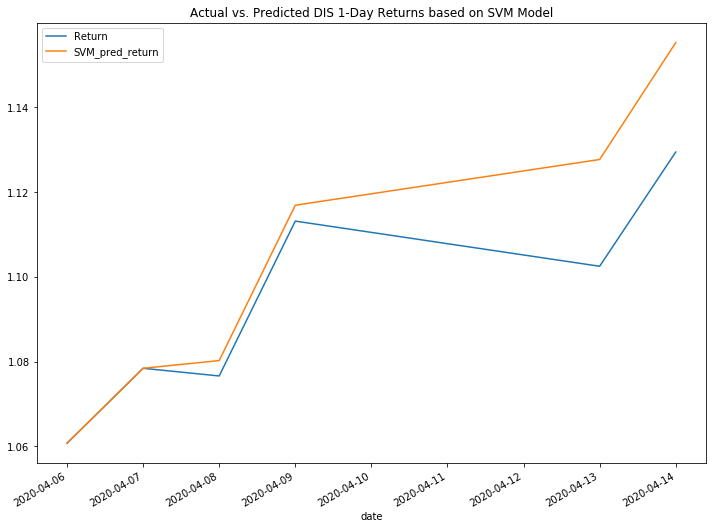

In [328]:
all_pred[['Return', 'SVM_pred_return']].cumsum().apply(np.exp).plot(figsize=(12, 9),
                                                      title=f'Actual vs. Predicted {ticker} {training_window}-Day Returns based on {M} Model'
                                                )
plt.savefig(f'../Images/actual_vs_outofsample_{M}_{ticker}_{training_window}d_return.png')

_**Out of Sample Test**_

In [329]:
training_window = 1

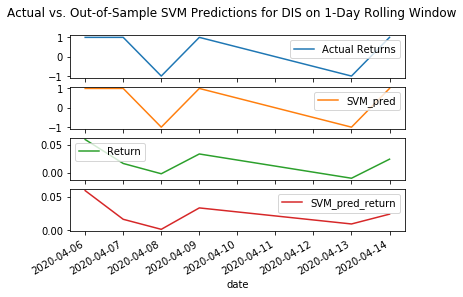

In [330]:
# Plot the first 20 predictions vs the true values
all_pred.plot(subplots=True, title=f'Actual vs. Out-of-Sample {M} Predictions for {ticker} on {training_window}-Day Rolling Window')
plt.savefig(f'../Images/actual_vs_outofsample_{M}_{ticker}_{training_window}d.png')

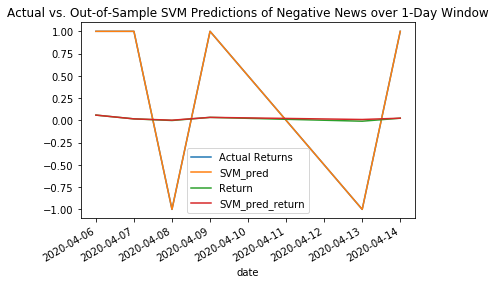

In [331]:
# Plot the first 20 predictions vs the true values
all_pred.plot(title=f'Actual vs. Out-of-Sample {M} Predictions of Negative News over {training_window}-Day Window')
plt.savefig(f'../Images/actual_vs_outofsample_{M}_{ticker}_{training_window}d_overlay.png')

In [332]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    all_pred["Actual Returns"],
    all_pred["SVM_pred"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample RMSE of this {training_window}-Day prediction on {ticker}: {out_of_sample_rmse:,.4f} over SVM model.")


Out-of-Sample RMSE of this 1-Day prediction on DIS: 0.0000 over SVM model.


In [333]:
#Calculate r2_score (r-squared)
r2_outofsample = r2_score(all_pred["Actual Returns"], all_pred["SVM_pred"])
print(f"Out-of-Sample R2 of this {training_window}-Day prediction on {ticker}: {r2_outofsample:,.4f} based on SVM model.")

Out-of-Sample R2 of this 1-Day prediction on DIS: 1.0000 based on SVM model.


_**In-Sample Predictions**_

In [334]:
# Construct a dataframe using just the "y" training data:
in_sample_results =  y_train

in_sample_results = pd.DataFrame({
    "Actual Returns": y_train,
#    "In-sample SVM Predictions": svm.predict(X_train_scaled)
})
in_sample_results

,Actual Returns
date,
2020-03-17,-1.0
2020-03-18,-1.0
2020-03-19,1.0
2020-03-20,-1.0
2020-03-23,-1.0
2020-03-24,1.0
2020-03-25,1.0
2020-03-26,1.0
2020-03-27,-1.0


In [341]:
in_sample_results["In-sample SVM Predictions"] = svm.predict(X_train)

In [342]:
in_sample_results

,Actual Returns,In-sample SVM Predictions
date,,
2020-03-17,-1.0,-1.0
2020-03-18,-1.0,-1.0
2020-03-19,1.0,1.0
2020-03-20,-1.0,-1.0
2020-03-23,-1.0,-1.0
2020-03-24,1.0,1.0
2020-03-25,1.0,1.0
2020-03-26,1.0,1.0
2020-03-27,-1.0,-1.0


In [343]:
in_sample_results['Actual Returns'].value_counts()

-1.0    8
 1.0    6
Name: Actual Returns, dtype: int64

In [344]:
in_sample_results['In-sample SVM Predictions'].value_counts()

-1.0    8
 1.0    6
Name: In-sample SVM Predictions, dtype: int64

In [345]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Actual Returns"],
    in_sample_results["In-sample SVM Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample RMSE of this {training_window}-Day prediction on {ticker}: {in_sample_rmse:,.4f} based on SVM.")

In-sample RMSE of this 1-Day prediction on DIS: 0.0000 based on SVM.


In [346]:
#Calculate r2_score (r-squared)
r2_insample = r2_score(in_sample_results["Actual Returns"], in_sample_results["In-sample SVM Predictions"])
print(f"In-Sample RMSE of this {training_window}-Day prediction on {ticker}: {r2_insample:,.4f}")

In-Sample RMSE of this 1-Day prediction on DIS: 1.0000


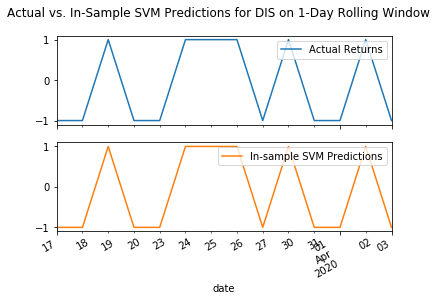

In [347]:
# Plot the first 20 predictions vs the true values
in_sample_results.plot(subplots=True, title=f'Actual vs. In-Sample {M} Predictions for {ticker} on {training_window}-Day Rolling Window')
plt.savefig(f'../Images/actual_vs_insample_{M}_{ticker}_{training_window}d.png')

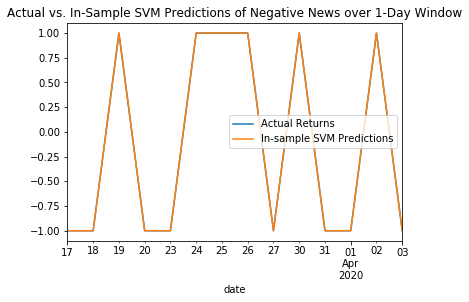

In [348]:
# Plot the first 20 predictions vs the true values
in_sample_results.plot(title=f'Actual vs. In-Sample {M} Predictions of Negative News over {training_window}-Day Window')
plt.savefig(f'../Images/actual_vs_insample_{M}_{ticker}_{training_window}d_overlay.png')

### _SVM Model Evaluation_

In [349]:
#Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, svm_pred)

1.0

In [350]:
print("Confusion Matrix - SVM")
confusion_matrix(y_test, svm_pred)

Confusion Matrix - SVM


array([[2, 0],
       [0, 4]])

In [351]:
from sklearn.metrics import classification_report

print("Classification Report - SVM")
print(classification_report(y_test, svm_pred))

Classification Report - SVM
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



#### _Logit Model - Produces Identical Results to SVM_

In [352]:
# ********* MODEL FITTING *************

   # --------- Loigt -----------
   # --------Start-------------
   
M = 'Logit'
        
from sklearn import linear_model 

lm = linear_model.LogisticRegression(C = 1e5)
lm

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [353]:
lm.fit(X_train_scaled, y_train)

   # --------- Logit ------------
   # ---------End -------------

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [354]:
# Score the accuracy
print(f"Training Data Score: {lm.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lm.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [355]:
lm_pred = lm.predict(X_test_scaled)

In [356]:
all_pred_lm = pd.DataFrame({
    "Actual Returns": y_test,
    "Logit_pred": lm_pred 
})
#.reset_index(drop=True)
all_pred_lm

   # --------- Logit ------------
   # ---------End -------------
# *****************************************

,Actual Returns,Logit_pred
date,,
2020-04-06,1.0,1.0
2020-04-07,1.0,1.0
2020-04-08,-1.0,-1.0
2020-04-09,1.0,1.0
2020-04-13,-1.0,-1.0
2020-04-14,1.0,1.0


In [357]:
all_pred_lm['Return'] = dis['return']
all_pred_lm['Logit_pred_return'] = all_pred_lm['Return'] * all_pred_lm['Logit_pred']

In [358]:
all_pred_lm

,Actual Returns,Logit_pred,Return,Logit_pred_return
date,,,,
2020-04-06,1.0,1.0,0.058944,0.058944
2020-04-07,1.0,1.0,0.016533,0.016533
2020-04-08,-1.0,-1.0,-0.001681,0.001681
2020-04-09,1.0,1.0,0.033374,0.033374
2020-04-13,-1.0,-1.0,-0.009615,0.009615
2020-04-14,1.0,1.0,0.024150,0.024150


In [359]:
all_pred_lm['Logit_pred'].value_counts()

 1.0    4
-1.0    2
Name: Logit_pred, dtype: int64

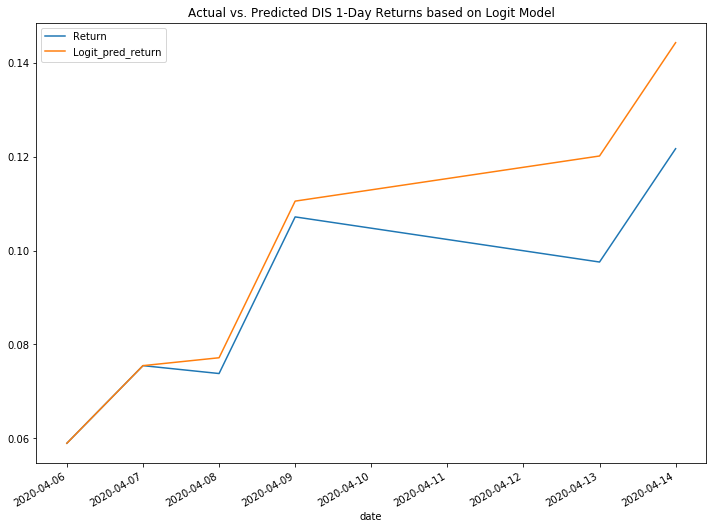

In [360]:
all_pred_lm[['Return', 'Logit_pred_return']].cumsum().plot(figsize=(12, 9),
                                                      title=f'Actual vs. Predicted {ticker} {training_window}-Day Returns based on {M} Model'
                                                )
plt.savefig(f'../Images/actual_vs_outofsample_{M}_{ticker}_{training_window}d_return.png')

_**Out-of-Sample Test**_

In [361]:
training_window = 1

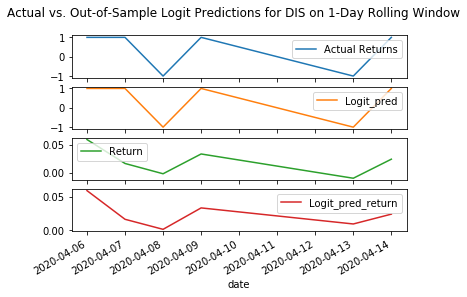

In [362]:
# Plot the first 20 predictions vs the true values
all_pred_lm.plot(subplots=True, title=f'Actual vs. Out-of-Sample {M} Predictions for {ticker} on {training_window}-Day Rolling Window')
plt.savefig(f'../Images/actual_vs_outofsample_{M}_{ticker}_{training_window}d.png')

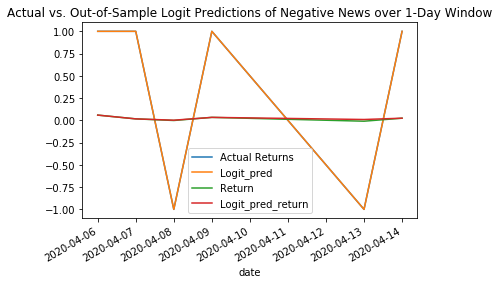

In [363]:
# Plot the first 20 predictions vs the true values
all_pred_lm.plot(title=f'Actual vs. Out-of-Sample {M} Predictions of Negative News over {training_window}-Day Window')
plt.savefig(f'../Images/actual_vs_outofsample_{M}_{ticker}_{training_window}d_overlay.png')

_**Logit Model Evaluation**_

In [364]:
#Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, lm_pred)

1.0

In [365]:
print("Confusion Matrix - SVM")
confusion_matrix(y_test, lm_pred)

Confusion Matrix - SVM


array([[2, 0],
       [0, 4]])

In [366]:
from sklearn.metrics import classification_report

print("Classification Report - SVM")
print(classification_report(y_test, lm_pred))

Classification Report - SVM
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### Resampling
_**Over Sampling with SMOTE**_

In [367]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [397]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=42, sampling_strategy=1.0).fit_resample(
    X_train, y_train
)
from collections import Counter

Counter(y_resampled)

Counter({-1.0: 8, 1.0: 8})

In [398]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model_smote = LogisticRegression(solver='lbfgs', random_state=42)
model_smote.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [399]:
# Calculated the balanced accuracy score
y_pred_smote = model_smote.predict(X_test)
balanced_accuracy_score(y_test, y_pred_smote)

1.0

In [400]:
# Display the confusion matrix
print("Confusion Matrix - SMOTE Oversampling")
confusion_matrix(y_test, y_pred_smote)

Confusion Matrix - SMOTE Oversampling


array([[2, 0],
       [0, 4]])

In [401]:
# Print the imbalanced classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Classification Report - SMOTE Oversampling")
print(classification_report_imbalanced(y_test, y_pred_smote))

Classification Report - SMOTE Oversampling
                   pre       rec       spe        f1       geo       iba       sup

       -1.0       1.00      1.00      1.00      1.00      1.00      1.00         2
        1.0       1.00      1.00      1.00      1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      1.00      1.00      1.00         6



In [402]:
# Plot the Precision Recall Curvey for both the SMOTEENN + Logistic Regression model
# and the Balanced Random Forest model
from sklearn.metrics import precision_recall_curve

probs_smote = model_smote.predict_proba(X_test)[:, 1]
#probs_smoteen = model_smoteenn.predict_proba(X_test)[:, 1]

precision_smote, recall_smote, _ = precision_recall_curve(y_test, probs_smote, pos_label=1)

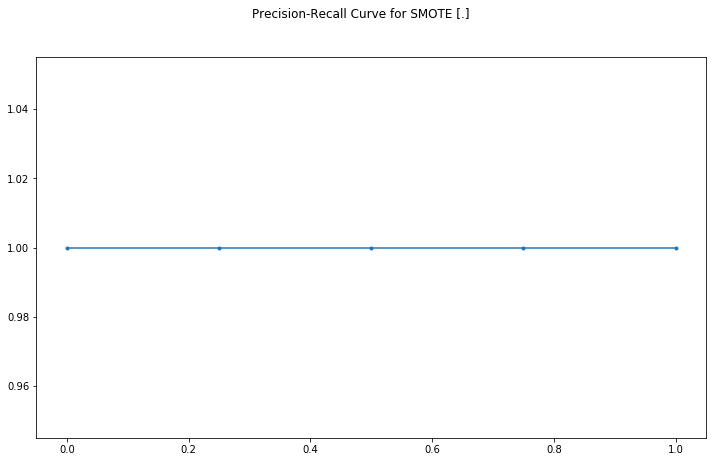

In [403]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,7))

plt.plot(recall_smote, precision_smote, marker='.')
#plt.plot(recall_smoteenn, precision_smoteenn, marker='x')

plt.suptitle('Precision-Recall Curve for SMOTE [.]')
plt.savefig('../Images/pr_curve_smote.png')

plt.show()

### _**Decision Tree**_

In [404]:
# Creating the decision tree classifier instance
model_tree = tree.DecisionTreeClassifier()

# Fitting the model
model_tree = model_tree.fit(X_train, y_train)

# Making predictions using the testing data
tree_pred = model_tree.predict(X_test)

In [405]:
# Evaluating the decision tree model

# Calculating the confusion matrix
cm = confusion_matrix(y_test, tree_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual -1", "Actual 1"], columns=["Predicted -1", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, tree_pred)

In [406]:
# Displaying results
print("Confusion Matrix - Decision Tree")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report - Decision Tree")
print(classification_report(y_test, tree_pred))

Confusion Matrix - Decision Tree


,Predicted -1,Predicted 1
Actual -1,2,0
Actual 1,0,4


Accuracy Score : 1.0
Classification Report - Decision Tree
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [407]:
features = dis.drop(columns=['ret_1','ret_2', 'ret_3', 'ret_4', 'ret_5', 'return_sign'])

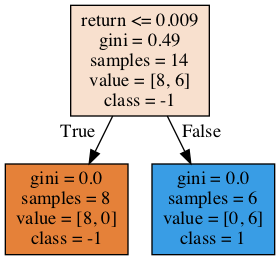

In [408]:
# Tree Visualization

# Graph tree
from sklearn import tree

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(
    model_tree, out_file=None, feature_names=features.columns, class_names=["-1", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [409]:
# Saving the tree as PDF
graph.write_pdf(f"../Images/{ticker}_{training_window}d_decision_tree.pdf")

# Saving the tree as PNG
graph.write_png(f"../Images/{ticker}_{training_window}d_decision_tree.png")

True

### _**Ensemble Learning**_

In [410]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

_**Balanced Random Forest Classifier**_

In [412]:
# Resample the training data with the RandomOversampler
# fit Random Forest Classifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=2, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=42,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [417]:
brf_pred = brf.predict(X_test)

balanced_accuracy_score(y_test, y_pred_brf)

1.0

In [418]:
# Display the confusion matrix
print("Confusion Matrix - Balanced Random Forest")
confusion_matrix(y_test, brf_pred)

Confusion Matrix - Balanced Random Forest


array([[2, 0],
       [0, 4]])

In [420]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print("Classification Report - Balanced Random Forest on Imbalanced Data")
print(classification_report_imbalanced(y_test, brf_pred))

Classification Report - Balanced Random Forest on Imbalanced Data
                   pre       rec       spe        f1       geo       iba       sup

       -1.0       1.00      1.00      1.00      1.00      1.00      1.00         2
        1.0       1.00      1.00      1.00      1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      1.00      1.00      1.00         6



In [421]:
# List the features sorted in descending order by feature importance

# Random Forests in sklearn will automatically calculate feature importance
#importances = brf.feature_importances_

# We can sort the features by their importance
#sorted(zip(brf.feature_importances_, X), reverse=True)

_**Easy Ensemble AdaBoost Classifier**_

In [423]:
from imblearn.ensemble import EasyEnsembleClassifier
adb = EasyEnsembleClassifier(n_estimators=100, random_state=42)
adb.fit(X_train, y_train)

EasyEnsembleClassifier(base_estimator=None, n_estimators=100, n_jobs=None,
                       random_state=42, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [428]:
# Calculated the balanced accuracy score
adb_pred = adb.predict(X_test)
balanced_accuracy_score(y_test, y_pred_adb)

1.0

In [429]:
# Display the confusion matrix
print("Confusion Matrix - Easy Emsemble AdaBoost")
confusion_matrix(y_test, y_pred_adb)

Confusion Matrix - Easy Emsemble AdaBoost


array([[2, 0],
       [0, 4]])

In [430]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print("Classification Report - Easy Ensemble AdaBoost on Imbalanced Data")
print(classification_report_imbalanced(y_test, adb_pred))

Classification Report - Easy Ensemble AdaBoost on Imbalanced Data
                   pre       rec       spe        f1       geo       iba       sup

       -1.0       1.00      1.00      1.00      1.00      1.00      1.00         2
        1.0       1.00      1.00      1.00      1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      1.00      1.00      1.00         6



_**Gradient Boosting Classifier**_

In [433]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000



In [434]:
# Learning rates produces identical outcome
#Use learning_rate of 0.75 for its higher training and testing scores compared to the rest

classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=42)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
grad_pred = classifier.predict(X_test)
pd.DataFrame({"Prediction": grad_pred, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,1.0,1.0
1,1.0,1.0
2,-1.0,-1.0
3,1.0,1.0
4,-1.0,-1.0
5,1.0,1.0


In [435]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, grad_pred)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 1.0


In [437]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, grad_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
print("Confusion Matrix - Gradient Boosting")
display(cm_df)

Confusion Matrix - Gradient Boosting


,Predicted 0,Predicted 1
Actual 0,2,0
Actual 1,0,4


In [438]:
# Generate classification report
print("Classification Report - Gradient Boosting on Imbalanced Data")
print(classification_report_imbalanced(y_test, grad_pred))

Classification Report - Gradient Boosting on Imbalanced Data
                   pre       rec       spe        f1       geo       iba       sup

       -1.0       1.00      1.00      1.00      1.00      1.00      1.00         2
        1.0       1.00      1.00      1.00      1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      1.00      1.00      1.00         6



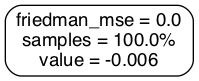

In [439]:
# Graph tree
from sklearn import tree

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    classifier.estimators_[12, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [440]:
# Saving the tree as PDF
graph.write_pdf(f"../Images/{ticker}_GradientBoosting_tree_{training_window}.pdf")

# Saving the tree as PNG
graph.write_png(f"../Images/{ticker}_GradientBoosting_tree_{training_window}.png")

True